In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./titanic dataset/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
imp_mean = SimpleImputer(strategy='mean')
df['Age'] = imp_mean.fit_transform(df[['Age']])

imp_mf = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imp_mf.fit_transform(df[['Embarked']])

In [6]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [7]:
enc = preprocessing.OneHotEncoder(sparse=False)
X_pre_enc = df[['Embarked']]
# enc.fit(X_pre_enc)
# X_enc = enc.transform(X_pre_enc)
X_enc = enc.fit_transform(X_pre_enc)
enc_df_embarked = pd.DataFrame(X_enc, columns=enc.get_feature_names_out(X_pre_enc.columns))
enc_df_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [8]:
# enc = preprocessing.OrdinalEncoder()
# X_pre_enc = df[['Sex']]
# enc.fit(X_pre_enc)
# X_enc = enc.transform(X_pre_enc)
# enc_df_sex = pd.DataFrame(X_enc, columns = ['Sex'])
# enc_df_sex.head()

enc = preprocessing.OneHotEncoder(sparse=False)
X_pre_enc = df[['Sex']]
X_enc = enc.fit_transform(X_pre_enc)
enc_df_sex = pd.DataFrame(X_enc, columns = enc.get_feature_names_out(X_pre_enc.columns))
enc_df_sex.head()

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [9]:
df.drop(columns=['Embarked', 'Sex'],inplace=True)
# df['Sex'] = enc_df_sex['Sex']
df['Embarked_C'] = enc_df_embarked['Embarked_C']
df['Embarked_Q'] = enc_df_embarked['Embarked_Q']
df['Embarked_S'] = enc_df_embarked['Embarked_S']
df['Sex_female'] = enc_df_sex['Sex_female']
df['Sex_male'] = enc_df_sex['Sex_male']
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


<AxesSubplot:>

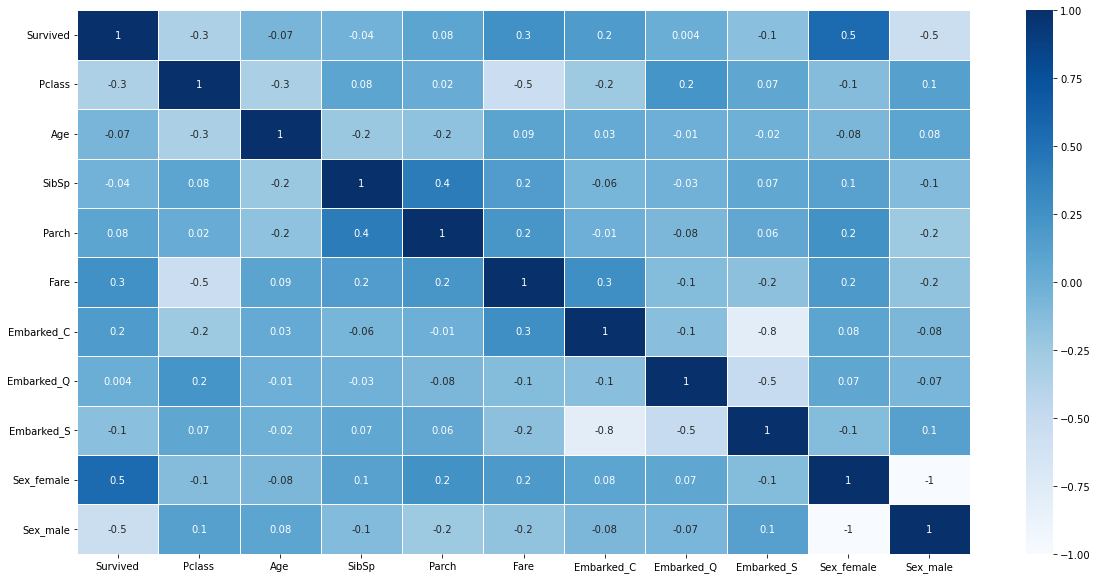

In [10]:
corr_matrix = df.corr()
corr_matrix
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".1g", linewidth=0.5)

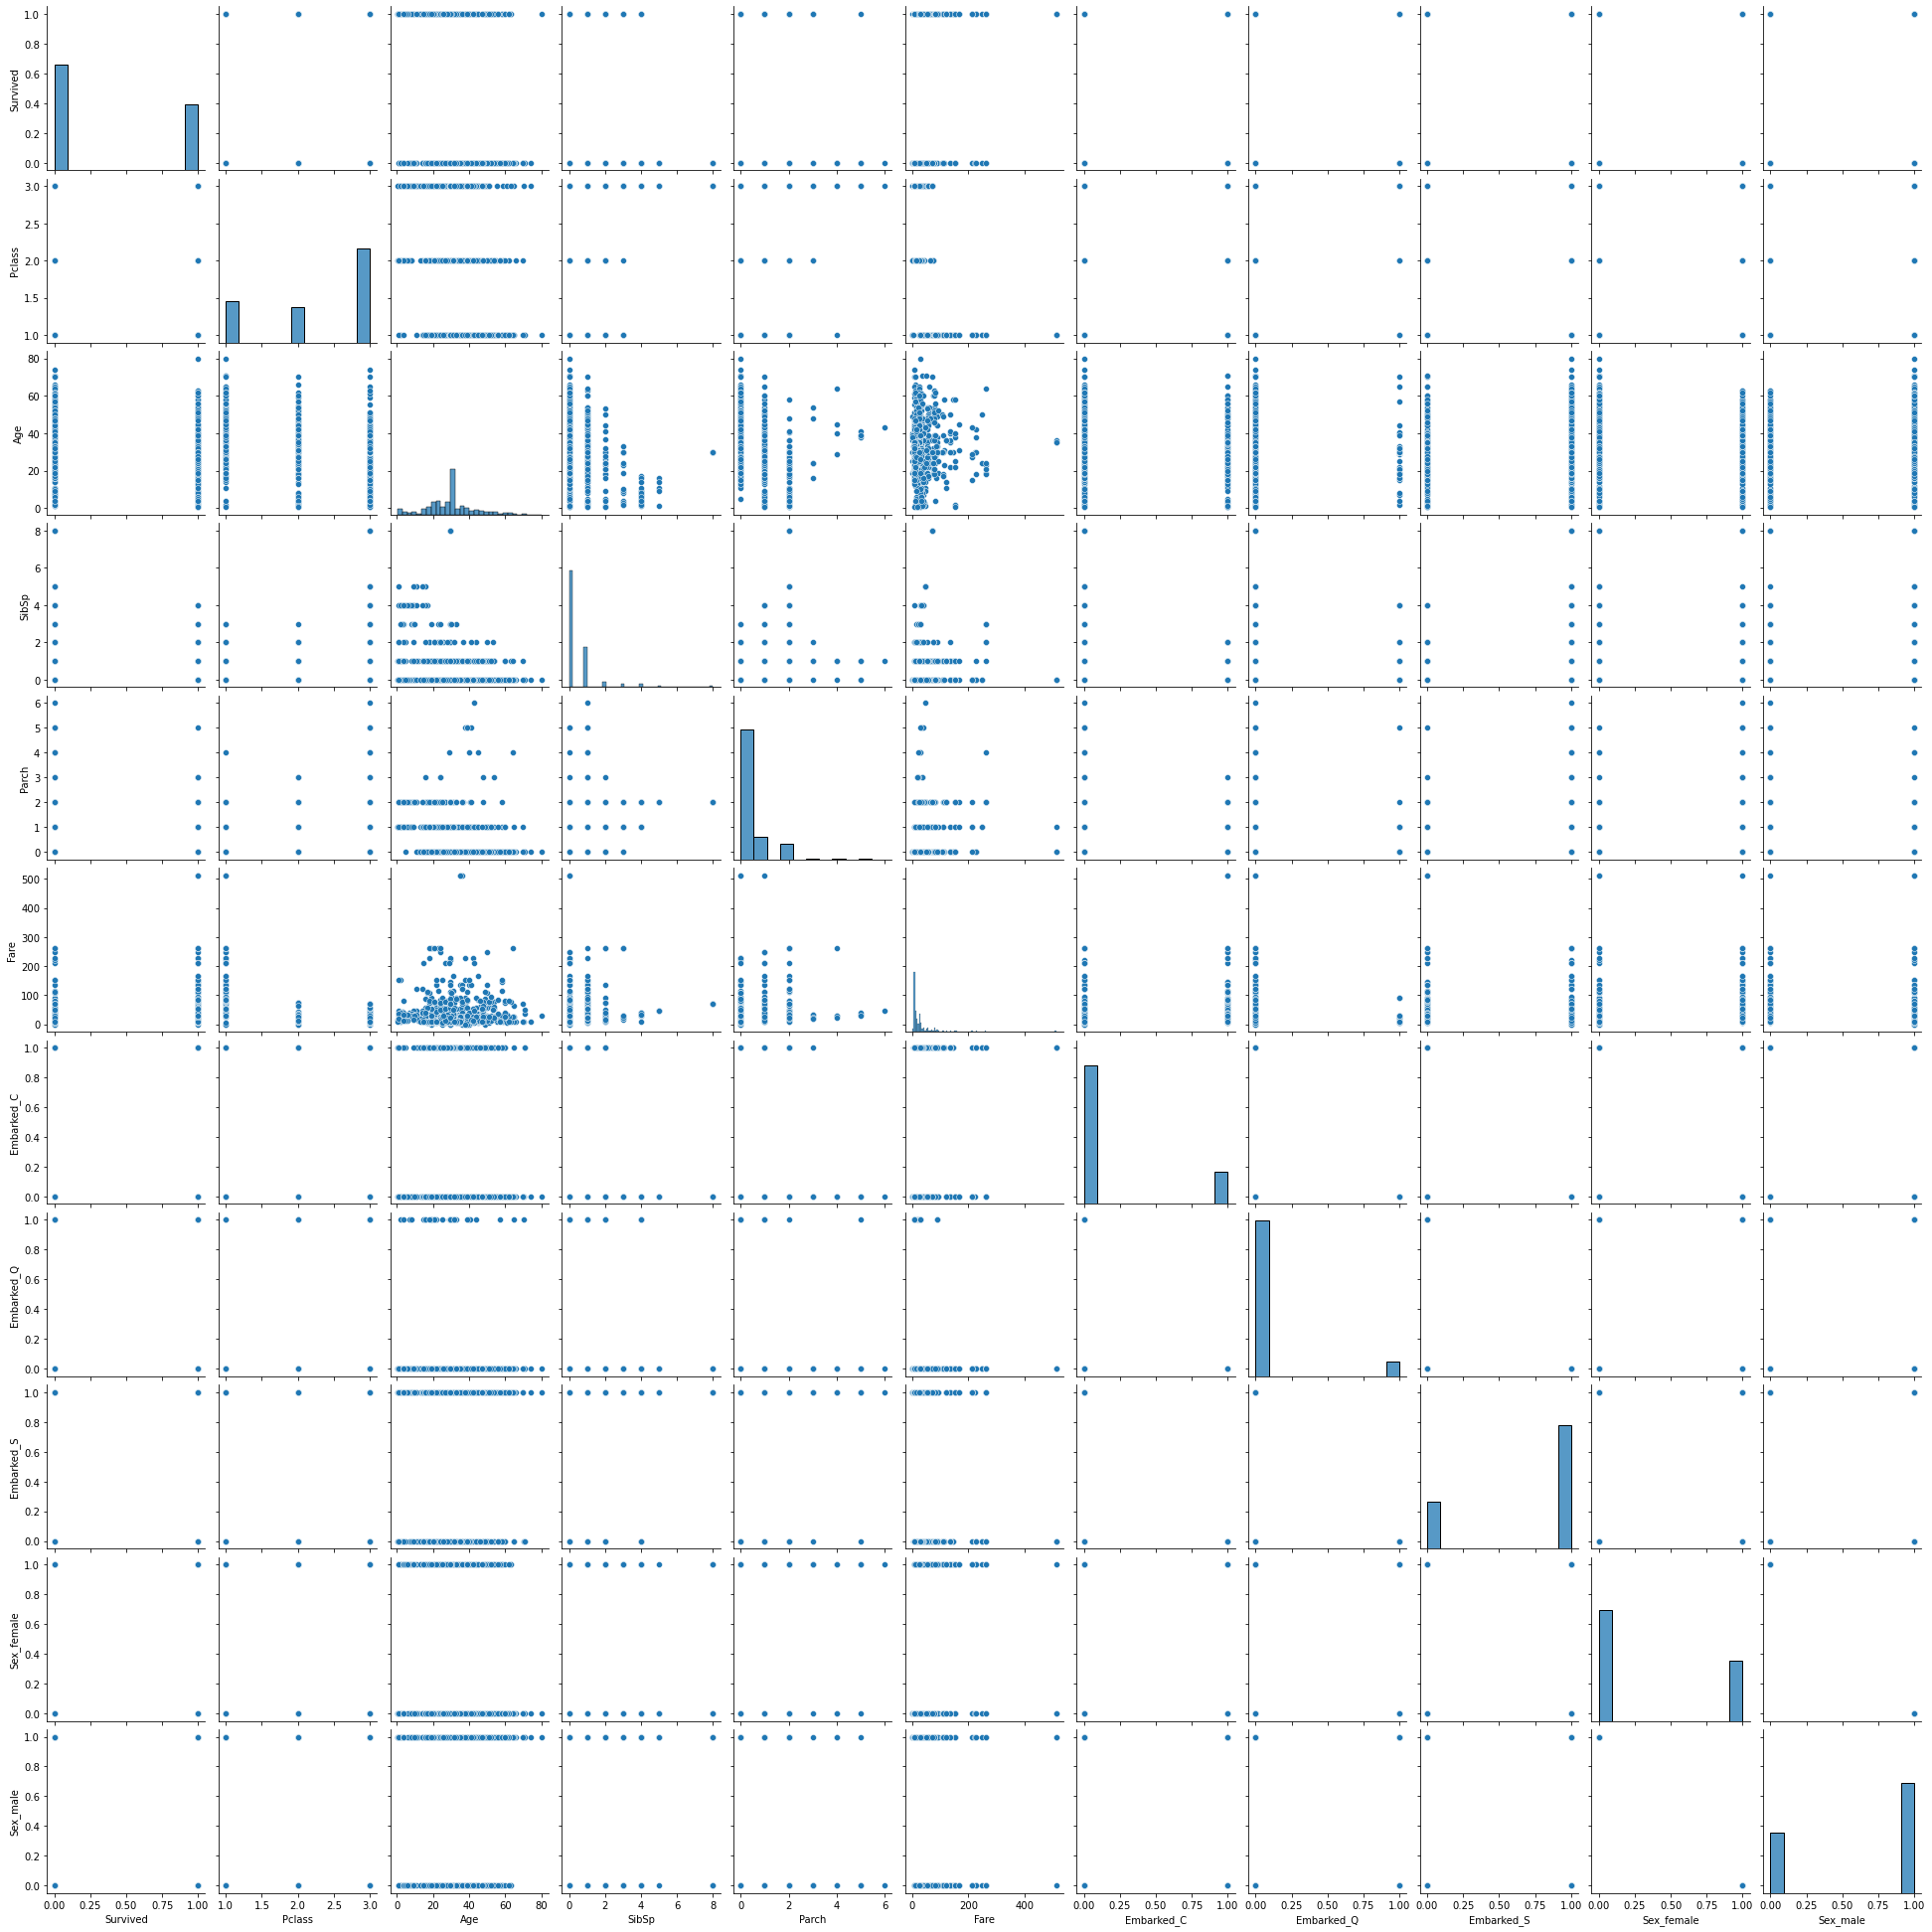

In [11]:
sns.pairplot(df)

In [12]:
minmaxcols = ['Age']
df_norm = df[minmaxcols]
df_val = df_norm.values
minmaxscaler =  preprocessing.MinMaxScaler()
df_scaled = minmaxscaler.fit_transform(df_val)
normalized_df_age = pd.DataFrame(df_scaled, columns = minmaxcols)
normalized_df_age.head()

,Age
0,0.271174
1,0.472229
2,0.321438
3,0.434531
4,0.434531


In [13]:
stdscalecols = ['Fare']
df_norm = df[stdscalecols]
df_val = df_norm.values
stdscaler = preprocessing.StandardScaler()
df_scaled = stdscaler.fit_transform(df_val)
normalized_df_fare = pd.DataFrame(df_scaled, columns = stdscalecols)
normalized_df_fare.head()

,Fare
0,-0.502445
1,0.786845
2,-0.488854
3,0.420730
4,-0.486337


In [14]:
df['Age'] = normalized_df_age['Age']
df['Fare'] = normalized_df_fare['Fare']
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,0.271174,1,0,-0.502445,0.0,0.0,1.0,0.0,1.0
1,1,1,0.472229,1,0,0.786845,1.0,0.0,0.0,1.0,0.0
2,1,3,0.321438,0,0,-0.488854,0.0,0.0,1.0,1.0,0.0
3,1,1,0.434531,1,0,0.420730,0.0,0.0,1.0,1.0,0.0
4,0,3,0.434531,0,0,-0.486337,0.0,0.0,1.0,0.0,1.0


In [15]:
# corr_matrix = df.corr()
# corr_matrix
# fig, ax = plt.subplots(figsize=(20,10))
# sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".1g", linewidth=0.5)

In [16]:
# sns.pairplot(df)

In [17]:
X_cols = ['Pclass', 'Sex_female','Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S' ]
X = df[X_cols]
y = df['Survived']
X.head()

,Pclass,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0.0,1.0,0.271174,1,0,-0.502445,0.0,0.0,1.0
1,1,1.0,0.0,0.472229,1,0,0.786845,1.0,0.0,0.0
2,3,1.0,0.0,0.321438,0,0,-0.488854,0.0,0.0,1.0
3,1,1.0,0.0,0.434531,1,0,0.420730,0.0,0.0,1.0
4,3,0.0,1.0,0.434531,0,0,-0.486337,0.0,0.0,1.0


In [18]:
df_test = pd.read_csv("./titanic dataset/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
df_test.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'],inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [20]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [21]:
imp_mean = SimpleImputer(strategy='mean')
df_test['Age'] = imp_mean.fit_transform(df_test[['Age']])

fare_class3 = df_test[df_test['Pclass']==3]
fare_list = fare_class3['Fare'].to_numpy()
fare_list = fare_list[~np.isnan(fare_list)]
mean_fare = np.mean(fare_list)

imp_const = SimpleImputer(strategy='constant', fill_value=mean_fare)
df_test['Fare'] = imp_const.fit_transform(df_test[['Fare']])

In [22]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
enc = preprocessing.OneHotEncoder(sparse=False)
X_pre_enc = df_test[['Embarked']]
enc.fit(X_pre_enc)
X_enc = enc.transform(X_pre_enc)
enc_df_test_embarked = pd.DataFrame(X_enc, columns=enc.get_feature_names_out(X_pre_enc.columns))
enc_df_test_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [24]:
# enc = preprocessing.OrdinalEncoder()
# X_pre_enc = df_test[['Sex']]
# enc.fit(X_pre_enc)
# X_enc = enc.transform(X_pre_enc)
# enc_df_test_sex = pd.DataFrame(X_enc, columns = ['Sex'])
# enc_df_test_sex.head()

enc = preprocessing.OneHotEncoder(sparse=False)
X_pre_enc = df_test[['Sex']]
X_enc = enc.fit_transform(X_pre_enc)
enc_df_test_sex = pd.DataFrame(X_enc, columns = enc.get_feature_names_out(X_pre_enc.columns))
enc_df_test_sex.head()

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [25]:
df_test.drop(columns=['Embarked', 'Sex'],inplace=True)
# df_test['Sex'] = enc_df_test_sex['Sex']
df_test['Embarked_C'] = enc_df_test_embarked['Embarked_C']
df_test['Embarked_Q'] = enc_df_test_embarked['Embarked_Q']
df_test['Embarked_S'] = enc_df_test_embarked['Embarked_S']
df_test['Sex_female'] = enc_df_test_sex['Sex_female']
df_test['Sex_male'] = enc_df_test_sex['Sex_male']
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,3,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0,1.0,0.0


In [26]:
minmaxcols = ['Age', 'Fare']
df_norm = df_test[minmaxcols]
df_val = df_norm.values
minmaxscaler =  preprocessing.MinMaxScaler()
df_scaled = minmaxscaler.fit_transform(df_val)
normalized_df_test = pd.DataFrame(df_scaled, columns = minmaxcols)
normalized_df_test.head()

,Age,Fare
0,0.452723,0.015282
1,0.617566,0.013663
2,0.815377,0.018909
3,0.353818,0.016908
4,0.287881,0.023984


In [27]:
df_test['Age'] = normalized_df_test['Age']
df_test['Fare'] = normalized_df_test['Fare']
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,0.452723,0,0,0.015282,0.0,1.0,0.0,0.0,1.0
1,3,0.617566,1,0,0.013663,0.0,0.0,1.0,1.0,0.0
2,2,0.815377,0,0,0.018909,0.0,1.0,0.0,0.0,1.0
3,3,0.353818,0,0,0.016908,0.0,0.0,1.0,0.0,1.0
4,3,0.287881,1,1,0.023984,0.0,0.0,1.0,1.0,0.0


In [28]:
X_cols = ['Pclass', 'Sex_female','Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S' ]
X_test_unknown = df_test[X_cols]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [30]:
clf_svc = SVC(max_iter = 10000000)
clf_svc.fit(X_train, y_train)
print("train accuracy = ", clf_svc.score(X_train, y_train) )
print("test accuracy = ", clf_svc.score(X_test, y_test))

train accuracy =  0.8188202247191011
test accuracy =  0.8044692737430168


In [31]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
print("train accuracy = ", clf_rf.score(X_train, y_train) )
print("test accuracy = ", clf_rf.score(X_test, y_test))

train accuracy =  0.9859550561797753
test accuracy =  0.7821229050279329


In [32]:
clf_lsvc = LinearSVC(max_iter = 10000000)
clf_lsvc.fit(X_train, y_train)
print("train accuracy = ", clf_lsvc.score(X_train, y_train) )
print("test accuracy = ", clf_lsvc.score(X_test, y_test))

train accuracy =  0.800561797752809
test accuracy =  0.8044692737430168


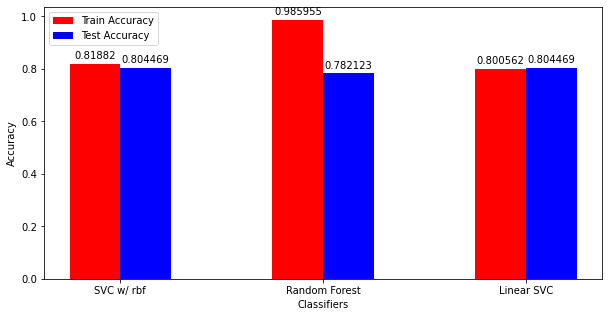

In [33]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
classifiers = ['SVC w/ rbf', 'Random Forest', 'Linear SVC']
labels = ['Train Accuracy', 'Test Accuracy']
train_accuracies = [ clf_svc.score(X_train, y_train), clf_rf.score(X_train, y_train), clf_lsvc.score(X_train, y_train)]
test_accuracies = [clf_svc.score(X_test, y_test), clf_rf.score(X_test, y_test), clf_lsvc.score(X_test, y_test)]
accuracy = [train_accuracies, test_accuracies]
colors = ['red','blue']

x = np.arange(len(classifiers))
for i in range(2):
    gr = ax.bar(x + (0.25*i), accuracy[i], width=0.25, align='edge', color=colors[i], label=labels[i])
    ax.bar_label(gr, padding=3)
plt.xticks(x+0.25,classifiers)
# ax.set_xticks(x+0.25, classifiers)
ax.legend( loc='upper left')

In [34]:
predict_label = clf_lsvc.predict(X_test_unknown)
df_test['Survive'] = predict_label
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Survive
0,3,0.452723,0,0,0.015282,0.0,1.0,0.0,0.0,1.0,0
1,3,0.617566,1,0,0.013663,0.0,0.0,1.0,1.0,0.0,0
2,2,0.815377,0,0,0.018909,0.0,1.0,0.0,0.0,1.0,0
3,3,0.353818,0,0,0.016908,0.0,0.0,1.0,0.0,1.0,0
4,3,0.287881,1,1,0.023984,0.0,0.0,1.0,1.0,0.0,1


In [35]:
df_test.to_csv('titanic_survivor_prediction.csv',index=False)